In [77]:
# importing libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm
import random
from sklearn import linear_model
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
%matplotlib inline

In [78]:
# importing data

data1 = pd.read_csv('/Users/maggieshi/Desktop/PiPACT_FinalReport/1foot.csv')
f2 = pd.read_csv('/Users/maggieshi/Desktop/PiPACT_FinalReport/2feet.csv')
f6 = pd.read_csv('/Users/maggieshi/Desktop/PiPACT_FinalReport/6feet.csv')
f8 = pd.read_csv('/Users/maggieshi/Desktop/PiPACT_FinalReport/8feet.csv')
f10 = pd.read_csv('/Users/maggieshi/Desktop/PiPACT_FinalReport/10feet.csv')
d1 = pd.read_csv('/Users/maggieshi/Desktop/PiPACT_FinalReport/1foot_2.csv')
f3 = pd.read_csv('/Users/maggieshi/Desktop/PiPACT_FinalReport/3feet.csv')
f4 = pd.read_csv('/Users/maggieshi/Desktop/PiPACT_FinalReport/4feet.csv')
f5 = pd.read_csv('/Users/maggieshi/Desktop/PiPACT_FinalReport/5feet.csv')
f7 = pd.read_csv('/Users/maggieshi/Desktop/PiPACT_FinalReport/7feet.csv')
f9 = pd.read_csv('/Users/maggieshi/Desktop/PiPACT_FinalReport/9feet.csv')
f4_i = pd.read_csv('/Users/maggieshi/Desktop/PiPACT_FinalReport/4feet_wall.csv')
f5_i = pd.read_csv('/Users/maggieshi/Desktop/PiPACT_FinalReport/5feet_wall.csv')
f6_i = pd.read_csv('/Users/maggieshi/Desktop/PiPACT_FinalReport/6feet_wall.csv')
f7_i = pd.read_csv('/Users/maggieshi/Desktop/PiPACT_FinalReport/7feet_wall.csv')

In [79]:
# there are always two addresses that appear, so I made a function to remove the one that was not the other Pi

def clean(data):
    return data[data['ADDRESS'] != '98:04:ED:C0:E4:41'].reset_index(drop=True)

In [80]:
# combining dataframes for two separate data collections, but both for 1 foot apart

f1 = pd.concat([data1,d1])

In [81]:
# cleaning data

f1 = clean(f1).reset_index(drop=True).drop(['SCAN'],axis=1)
f2 = clean(f2).reset_index(drop=True).drop(['SCAN'],axis=1)
f3 = clean(f3).reset_index(drop=True).drop(['SCAN'],axis=1)
f4 = clean(f4).reset_index(drop=True).drop(['SCAN'],axis=1)
f5 = clean(f5).reset_index(drop=True).drop(['SCAN'],axis=1)
f6 = clean(f6).reset_index(drop=True).drop(['SCAN'],axis=1)
f7 = clean(f7).reset_index(drop=True).drop(['SCAN'],axis=1)
f8 = clean(f8).reset_index(drop=True).drop(['SCAN'],axis=1)
f9 = clean(f9).reset_index(drop=True).drop(['SCAN'],axis=1)
f10 = clean(f10).reset_index(drop=True).drop(['SCAN'],axis=1)

f4_i = clean(f4_i).reset_index(drop=True).drop(['SCAN'],axis=1)
f5_i = clean(f5_i).reset_index(drop=True).drop(['SCAN'],axis=1)
f6_i = clean(f6_i).reset_index(drop=True).drop(['SCAN'],axis=1)
f7_i = clean(f7_i).reset_index(drop=True).drop(['SCAN'],axis=1)

In [82]:
# adding respective distance and obstruction values to each dataframe
# I could not find a better way to do it other than hard coding it

# distances in feet

dist = [1.0,1.0,1.0]
dist = np.append(dist, np.zeros(f1['RSSI'].size-3) + np.nan)
f1['distance'] = dist

dist = [2.0,2.0,2.0]
dist = np.append(dist, np.zeros(f2['RSSI'].size-3) + np.nan)
f2['distance'] = dist

dist = [3.0,3.0,3.0]
dist = np.append(dist, np.zeros(f3['RSSI'].size-3) + np.nan)
f3['distance'] = dist

dist = [4.0,4.0,4.0]
dist = np.append(dist, np.zeros(f4['RSSI'].size-3) + np.nan)
f4['distance'] = dist

dist = [4.0,4.0,4.0]
dist = np.append(dist, np.zeros(f4_i['RSSI'].size-3) + np.nan)
f4_i['distance'] = dist

dist = [5.0,5.0,5.0]
dist = np.append(dist, np.zeros(f5['RSSI'].size-3) + np.nan)
f5['distance'] = dist

dist = [5.0,5.0,5.0]
dist = np.append(dist, np.zeros(f5_i['RSSI'].size-3) + np.nan)
f5_i['distance'] = dist

dist = [6.0,6.0,6.0]
dist = np.append(dist, np.zeros(f6['RSSI'].size-3) + np.nan)
f6['distance'] = dist

dist = [6.0,6.0,6.0]
dist = np.append(dist, np.zeros(f6_i['RSSI'].size-3) + np.nan)
f6_i['distance'] = dist

dist = [7.0,7.0,7.0]
dist = np.append(dist, np.zeros(f7['RSSI'].size-3) + np.nan)
f7['distance'] = dist

dist = [7.0,7.0,7.0]
dist = np.append(dist, np.zeros(f7_i['RSSI'].size-3) + np.nan)
f7_i['distance'] = dist

dist = [8.0,8.0,8.0]
dist = np.append(dist, np.zeros(f8['RSSI'].size-3) + np.nan)
f8['distance'] = dist

dist = [9.0,9.0,9.0]
dist = np.append(dist, np.zeros(f9['RSSI'].size-3) + np.nan)
f9['distance'] = dist

dist = [10.0,10.0,10.0]
dist = np.append(dist, np.zeros(f10['RSSI'].size-3) + np.nan)
f10['distance'] = dist


# obstruction values: 0.0 no, 1.0 yes

obs = [0.0,0.0,0.0]
obs = np.append(obs, np.zeros(f1['RSSI'].size-3) + np.nan)
f1['obstruction'] = obs

obs = [0.0,0.0,0.0]
obs = np.append(obs, np.zeros(f2['RSSI'].size-3) + np.nan)
f2['obstruction'] = obs

obs = [0.0,0.0,0.0]
obs = np.append(obs, np.zeros(f3['RSSI'].size-3) + np.nan)
f3['obstruction'] = obs

obs = [0.0,0.0,0.0]
obs = np.append(obs, np.zeros(f4['RSSI'].size-3) + np.nan)
f4['obstruction'] = obs

obs = [0.0,0.0,0.0]
obs = np.append(obs, np.zeros(f5['RSSI'].size-3) + np.nan)
f5['obstruction'] = obs

obs = [0.0,0.0,0.0]
obs = np.append(obs, np.zeros(f6['RSSI'].size-3) + np.nan)
f6['obstruction'] = obs

obs = [0.0,0.0,0.0]
obs = np.append(obs, np.zeros(f7['RSSI'].size-3) + np.nan)
f7['obstruction'] = obs

obs = [0.0,0.0,0.0]
obs = np.append(obs, np.zeros(f8['RSSI'].size-3) + np.nan)
f8['obstruction'] = obs

obs = [0.0,0.0,0.0]
obs = np.append(obs, np.zeros(f9['RSSI'].size-3) + np.nan)
f9['obstruction'] = obs

obs = [0.0,0.0,0.0]
obs = np.append(obs, np.zeros(f10['RSSI'].size-3) + np.nan)
f10['obstruction'] = obs


obs = [1.0,1.0,1.0]
obs = np.append(obs, np.zeros(f4_i['RSSI'].size-3) + np.nan)
f4_i['obstruction'] = obs

obs = [1.0,1.0,1.0]
obs = np.append(obs, np.zeros(f5_i['RSSI'].size-3) + np.nan)
f5_i['obstruction'] = obs

obs = [1.0,1.0,1.0]
obs = np.append(obs, np.zeros(f6_i['RSSI'].size-3) + np.nan)
f6_i['obstruction'] = obs

obs = [1.0,1.0,1.0]
obs = np.append(obs, np.zeros(f7_i['RSSI'].size-3) + np.nan)
f7_i['obstruction'] = obs

In [83]:
# function for getting general information about a dataframe

def get_info(data):
    print(data['RSSI'].size)
    mean = data['RSSI'].mean()
    sigma = data['RSSI'].std()
    lower = data['RSSI'].min()
    upper = data['RSSI'].max()
    print('mean:'+str(mean)+"     std:"+str(sigma)+"     minimum RSSI:"+str(lower)+"     maximum RSSI:"+str(upper))
    print()

    
# function for plotting the pdf graph for a single dataframe

def pdf_plot(data):
    mean = data['RSSI'].mean()
    sigma = data['RSSI'].std()
    lower = data['RSSI'].min()
    upper = data['RSSI'].max()
    
    y_prob = []
    for i in data['RSSI']:
        y = norm(mean, sigma).pdf(i)
        y_prob.append(y)

    plt.bar(data['RSSI'],y_prob)
    plt.xlabel('RSSI')
    plt.ylabel('PDF')
    plt.show()
    
    
# function for plotting the pdf graph of multiple dataframes at once

def pdf_plots(*args):
    for data in args:
        mean = data['RSSI'].mean()
        sigma = data['RSSI'].std()
        lower = data['RSSI'].min()
        upper = data['RSSI'].max()
    
        y_prob = []
        for i in data['RSSI']:
            y = norm(mean, sigma).pdf(i)
            y_prob.append(y)

        plt.bar(data['RSSI'],y_prob)
    plt.xlabel('RSSI')
    plt.ylabel('PDF')
    plt.show()

In [84]:
# for just visualizing or possibly seeing trends in RSSI or standard deviation

get_info(f1)
get_info(f2)
get_info(f3)
get_info(f4)
get_info(f5)
get_info(f6)
get_info(f7)
get_info(f8)
get_info(f9)
get_info(f10)

get_info(f4_i)
get_info(f5_i)
get_info(f6_i)
get_info(f7_i)

978
mean:-42.964212678936605     std:3.4311099218125802     minimum RSSI:-51     maximum RSSI:-31

724
mean:-48.950276243093924     std:1.6211815205206632     minimum RSSI:-52     maximum RSSI:-44

694
mean:-53.128242074927954     std:3.5504174206010055     minimum RSSI:-61     maximum RSSI:-32

637
mean:-66.6043956043956     std:4.201734385138007     minimum RSSI:-81     maximum RSSI:-48

603
mean:-57.091210613598676     std:2.5770464616562503     minimum RSSI:-67     maximum RSSI:-41

621
mean:-59.01610305958132     std:2.4983345967070805     minimum RSSI:-63     maximum RSSI:-54

605
mean:-71.64132231404959     std:4.603692540076669     minimum RSSI:-97     maximum RSSI:-55

612
mean:-69.37581699346406     std:2.1557831829190377     minimum RSSI:-74     maximum RSSI:-65

592
mean:-74.63851351351352     std:5.685889842644996     minimum RSSI:-97     maximum RSSI:-58

702
mean:-66.9045584045584     std:1.8826505024986377     minimum RSSI:-74     maximum RSSI:-50

542
mean:-61.34132841

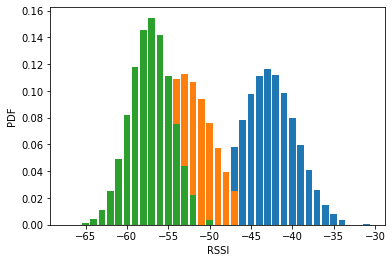

In [85]:
pdf_plots(f1,f3,f5)

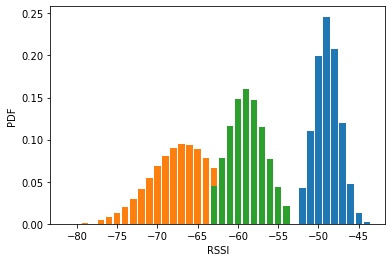

In [86]:
pdf_plots(f2,f4,f6)

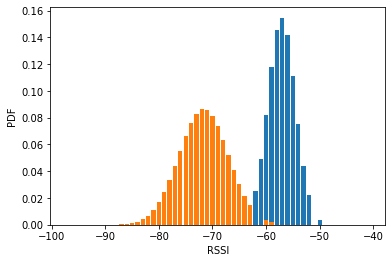

In [87]:
pdf_plots(f5,f7)

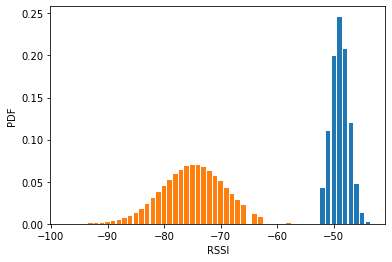

In [88]:
pdf_plots(f2,f9)

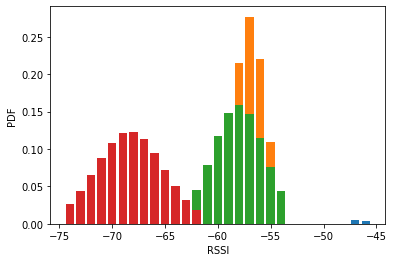

In [89]:
pdf_plots(f4_i,f5_i,f6_i,f7_i)

In [90]:
# function to combine all dataframes into one big dataframe for use in machine learning model

def get_data(*args):
    df = pd.DataFrame()
    mean = []
    std = []
    dist = []
    obs = []
    prox = []
    for arg in args:
        arg = clean(arg)
        mean.append((arg['RSSI'].mean())*(random.random()/50+1))
        std.append((arg['RSSI'].std())*(random.random()/50+1))
        dist.append(arg['distance'][1])
        obs.append(arg['obstruction'][1])
        if ((arg['distance'][1]>=6.0) & (arg['obstruction'][1]!=1.0)):
            prox.append(0.0)
        elif ((arg['distance'][1]<6.0) & (arg['obstruction'][1]!=1.0)):
            prox.append(1.0)
        else:
            prox.append(np.nan)
    df['mean'] = mean
    df['std'] = std
    df['distance'] = dist
    df['obstruction'] = obs
    df['proximity'] = prox
    return df

In [91]:
df = pd.DataFrame()
for i in range(100):
    df = pd.concat([get_data(f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f4_i,f5_i,f6_i,f7_i),df])
    df = pd.concat([get_data(f4_i,f5_i,f6_i,f7_i),df])

df = df.reset_index(drop=True)
df[0:14]

,mean,std,distance,obstruction,proximity
0,-61.955542,6.396193,4.0,1.0,NaN
1,-57.410522,1.442417,5.0,1.0,NaN
2,-58.159827,2.524213,6.0,1.0,NaN
3,-68.412590,3.272819,7.0,1.0,NaN
4,-43.610822,3.461639,1.0,0.0,1.0
5,-49.836438,1.643890,2.0,0.0,1.0
6,-53.746374,3.577858,3.0,0.0,1.0
7,-67.306797,4.220098,4.0,0.0,1.0
8,-57.222635,2.581108,5.0,0.0,1.0
9,-59.749623,2.522258,6.0,0.0,0.0


In [113]:
x = df.drop(['obstruction','proximity'], axis=1)
y = df['obstruction']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

model = MLPClassifier()
model.fit(x_train,y_train)

/Users/maggieshi/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [114]:
# accuracy score on training data

print("accuracy score of training data: ")
accuracy_score(y_train, model.predict(x_train))

accuracy score of training data: 


0.8571428571428571

In [115]:
# accuracy score on testing data

y_pred = model.predict(x_test)
print("accuracy score of test data: ")
accuracy_score(y_test, y_pred)

accuracy score of test data: 


0.8462962962962963

In [116]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("true negatives:"+str(tn) + " false positives:" + str(fp) + " false negatives:" + str(fn) + " true positives:" + str(tp))
# reduce fp as much as possible

true negatives:219 false positives:83 false negatives:0 true positives:238


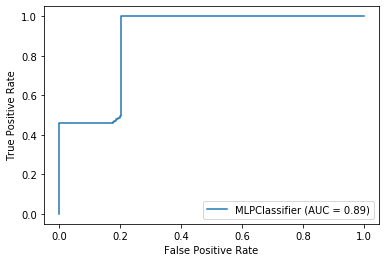

In [117]:
# plot roc curve

plot_roc_curve(model, x_test, y_test)
plt.show()

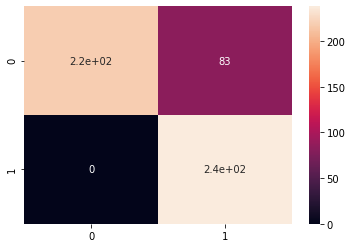

In [118]:
# visualizing true positives, false negatives, true negatives, and false positives

sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)

In [98]:
# copy dataframe to a new one so we can drop the NaN values for when there is obstruction

df2 = df.copy()
df2 = df2.dropna().reset_index(drop=True)

In [99]:
x = df2.drop(['proximity','distance','obstruction'], axis=1)
y = df2['proximity']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

model = MLPClassifier()
model.fit(x_train,y_train)

/Users/maggieshi/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [100]:
# accuracy score on training data

print("accuracy score of training data: ")
accuracy_score(y_train, model.predict(x_train))

accuracy score of training data: 


0.8914285714285715

In [101]:
# accuracy score on testing data

y_pred = model.predict(x_test)
print("accuracy score of test data: ")
accuracy_score(y_test, y_pred)

accuracy score of test data: 


0.92

In [102]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("true negatives:"+str(tn) + " false positives:" + str(fp) + " false negatives:" + str(fn) + " true positives:" + str(tp))
# reduce fn as much as possible

true negatives:163 false positives:0 false negatives:24 true positives:113


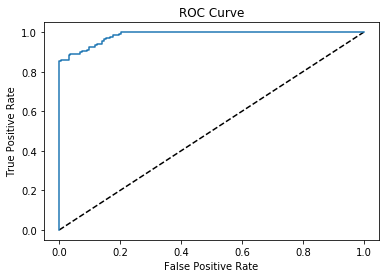

In [103]:
# compute predicted probabilities: y_pred_prob
y_pred_prob = model.predict_proba(x_test)[:,1]

# penerate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [104]:
# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = model.predict_proba(x_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.9844610630961443


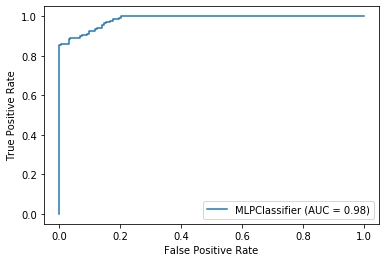

In [105]:
# plot roc curve
plot_roc_curve(model, x_test, y_test)
plt.show()

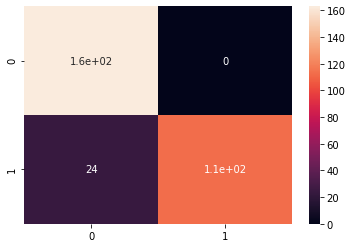

In [106]:
# visualizing true positives, false negatives, true negatives, and false positives
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)